# **Problem Statement**
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.  Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.  To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

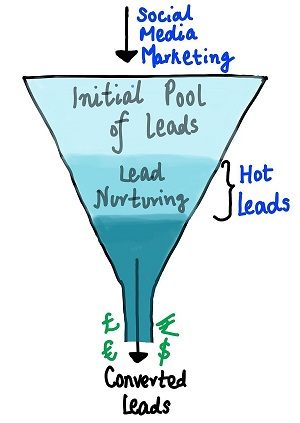


**"The company requires a model that will assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance."**

## Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

#suppressing warnings
import warnings
warnings.filterwarnings('ignore')


## Reading Dataset

In [2]:
# importing dataset
df_leads=pd.read_csv('Leads.csv')

In [3]:
#reading dataset
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#printing shape of dataset
df_leads.shape

(9240, 37)

In [5]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data cleaning

In [7]:
#checking for null values in dataset
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#dropping columns contains null values more than 3000
for cols in df_leads.columns:
    if df_leads[cols].isnull().sum()>3000:
        df_leads.drop(cols,1,inplace=True)

In [9]:
#checking for null values again 
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
#dropping columns with one unique value since it won't affect our analysis
df_leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [12]:
df_leads.shape

(9240, 26)

In [13]:
# Get the value counts of all the columns

for column in df_leads:
    print(df_leads[column].astype('category').value_counts())
    print('___________________________________________________')


000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

'Select' statement indicates that if customer have not selected any option then options will be considered as 'Select' hence select option can be consider as NA. We can drop column if column have too many select option.

In [14]:
# As we checked 'How did you hear about X Education','Lead Profile' has too many NA value hence we can drop it
df_leads.drop(['How did you hear about X Education','Lead Profile'], axis=1, inplace=True)

In [15]:
# List of columns having 'Select' as value

cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)


['Specialization', 'City']


In [16]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)


In [17]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

**Insights:**
    
1) City: City has 3669 missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence City column can be dropped.

2) Specialization: Specialization has 3380 missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called 'Others'.

3) What matters most to you in choosing a course: This variable has 2709 missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight.

4) What is your current occupation: We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

5) Country: X Education sells online courses and appx 96% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.

6) Last Activity: "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.

7) Lead Source: "Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'



In [18]:
#dropping above mentioned columns
df_leads.drop(['City','What matters most to you in choosing a course','Country'],axis=1,inplace=True)

In [19]:
df_leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
What is your current occupation           2690
Search                                       0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

### Imputing missing values


In [20]:
# Imputing values as per the above observations/insights
missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)


In [21]:
df_leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [22]:
#checking values for TotalVisits
df_leads.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [23]:
#imputing total visit null value with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0],inplace=True)

In [24]:
#checking values for Page Views Per Visit 
df_leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [25]:
#importing Page Views Per Visit null value with mode
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0],inplace=True)

In [26]:
df_leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [27]:
#checking for unique values 
#checking for wrong entries in columns
for i in df_leads.columns:
    print('{} : {}'.format(i,df_leads[i].unique()))
    print("-"*100)


Prospect ID : ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
----------------------------------------------------------------------------------------------------
Lead Number : [660737 660728 660727 ... 579545 579538 579533]
----------------------------------------------------------------------------------------------------
Lead Origin : ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
----------------------------------------------------------------------------------------------------
Lead Source : ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_R

In [28]:
# converting lead source to lower case since Google and google shows as separate unique value
df_leads['Lead Source']=df_leads['Lead Source'].apply(lambda x: x.lower())

Columns such as:

'Prospect ID',
'Lead Number',
'Last Notable Activity'
Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [29]:
#dropping unwanted column
df_leads.drop(['Last Notable Activity','Prospect ID','Lead Number'],inplace=True,axis=1)


In [30]:
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

In [31]:
categorical_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

#### Checking values for categorical columns and dropping unwanted columns


<Figure size 432x288 with 0 Axes>

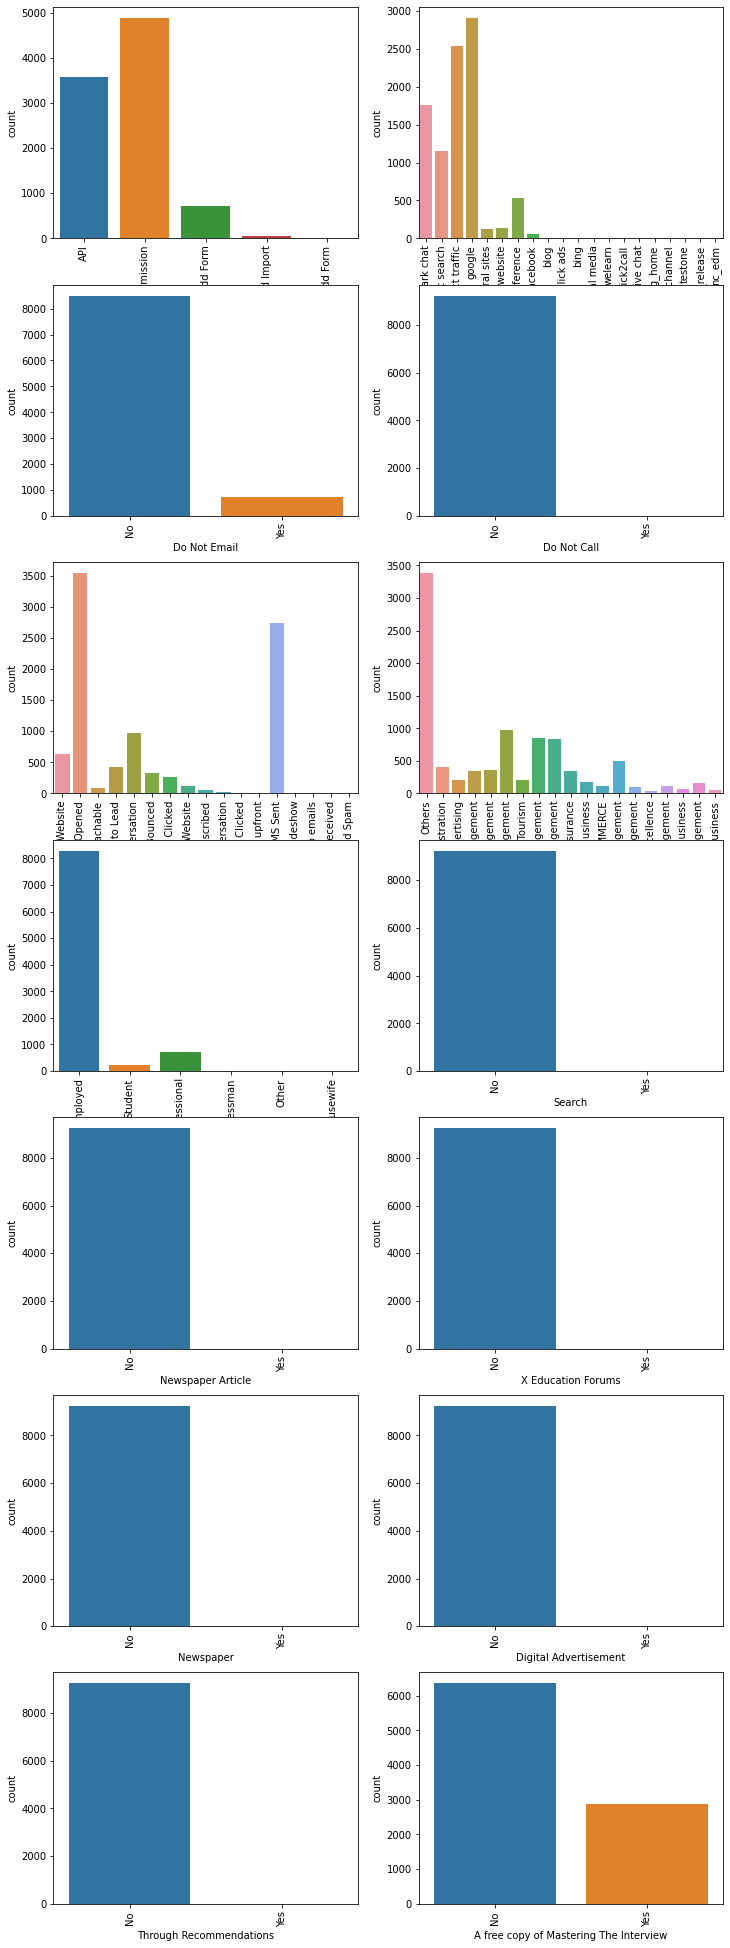

In [32]:
plt.subplots_adjust(wspace=.2,hspace=2)
plt.figure(figsize=(12,40))

for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads) 
    plt.xticks(rotation=90)


NOTE: Following columns have data which is highly skewed :

- 'Do Not Call',
- 'Search',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations'.

Hence these columns will be dropped as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can lead to biased or inaccurate parameter estimates.



In [33]:
#dropping columns
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations'],inplace=True,axis=1)

In [34]:
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

In [35]:
df_leads.shape

(9240, 11)

In [36]:
continuous_col=["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

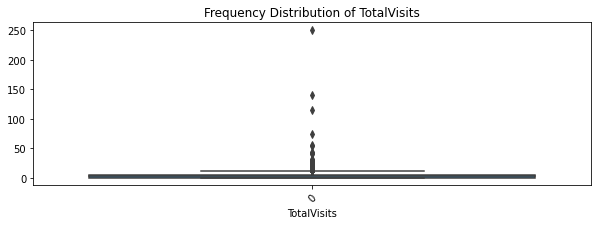

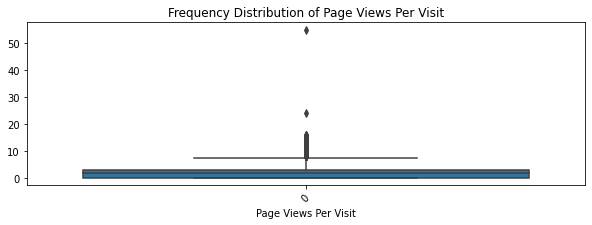

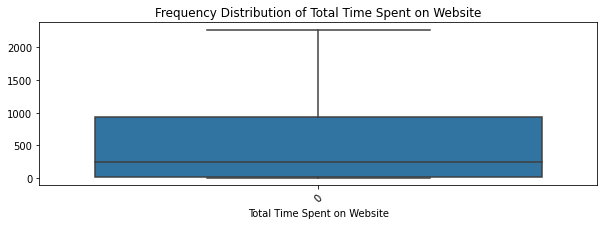

In [41]:
# Checking for outliers
for i in continuous_col:
    plt.figure(figsize=([10,3]))
    sns.boxplot(df_leads[i])
    plt.xlabel(i)
    plt.title("Frequency Distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

In [42]:
# before outlier treatment
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [44]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
 

In [45]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(df_leads,capping_cols)


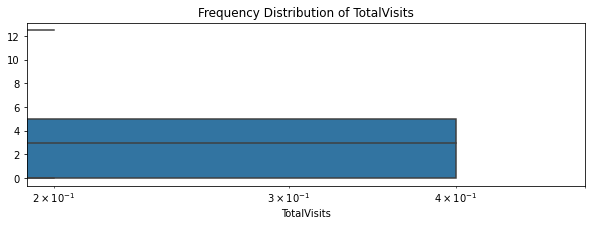

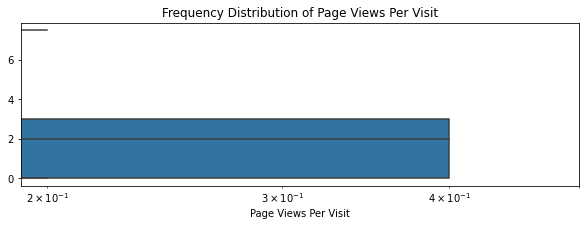

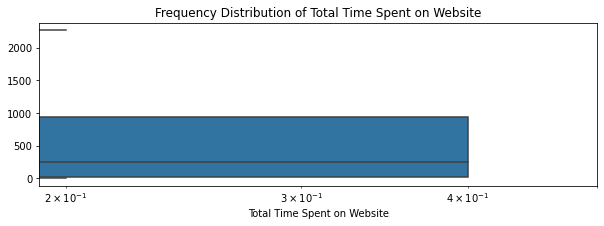

In [46]:
# Checking Boxplot after Outlier Treatment

numerical_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
# Checking for outliers
for i in numerical_cols:
    plt.figure(figsize=([10,3]))
    sns.boxplot(df_leads[i])
    plt.xlabel(i)
    plt.title("Frequency Distribution of "+i)
    plt.xticks(rotation=45)
    plt.xscale('log')
    plt.show()

In [47]:
# after outlier treatment detailed percentile values
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


In [48]:
# Calculating imbalance percentage
100*(df_leads['Converted'].value_counts())/len(df_leads)

0    61.461039
1    38.538961
Name: Converted, dtype: float64

Text(0.5, 1.0, 'Anaylsis for Imbalance for Converted')

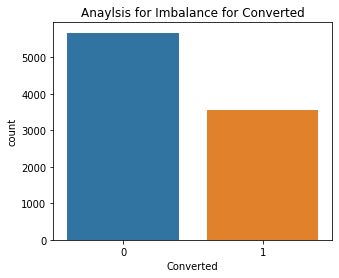

In [49]:
plt.figure(figsize=([5,4]))
sns.countplot(data=df_leads,x='Converted')
plt.title('Anaylsis for Imbalance for Converted')


## Univariant analysis

### Univariant analysis on continuous variable


In [50]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

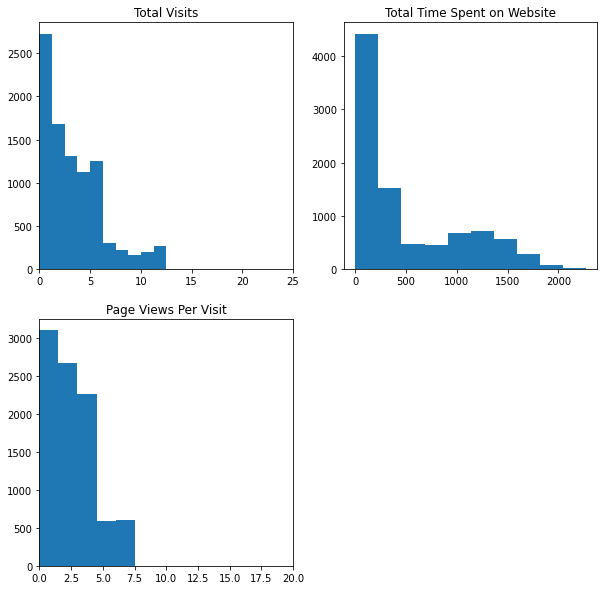

In [51]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_leads['TotalVisits'], bins = 10)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_leads['Page Views Per Visit'], bins = 5)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Univariant analysis on categorical variable


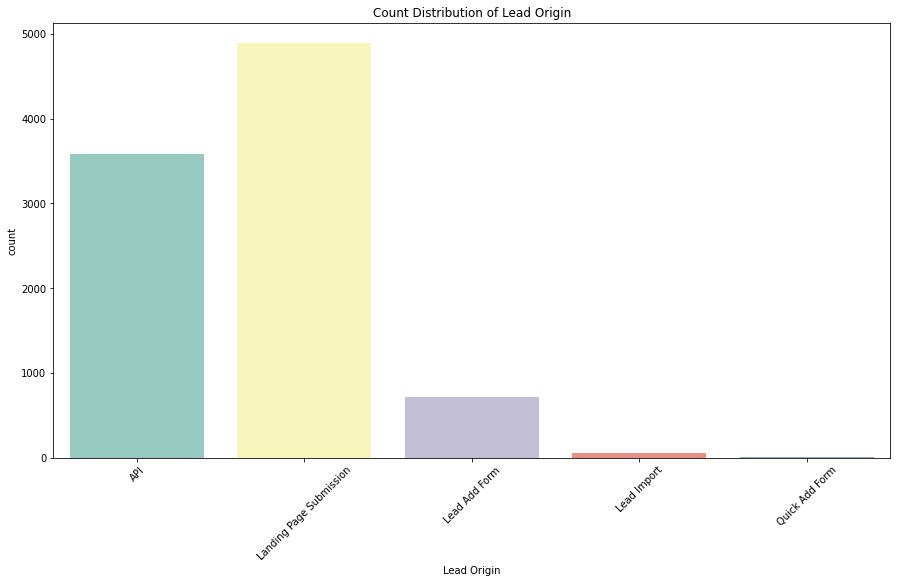

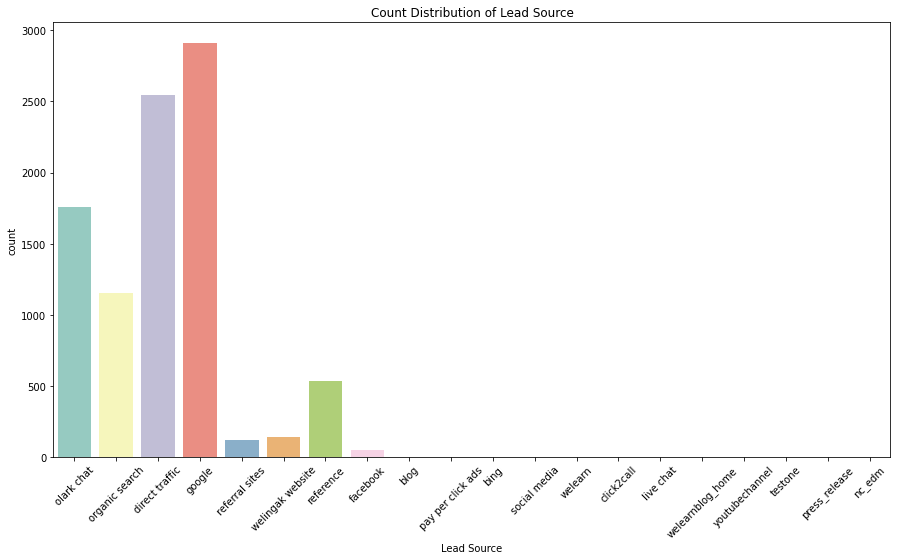

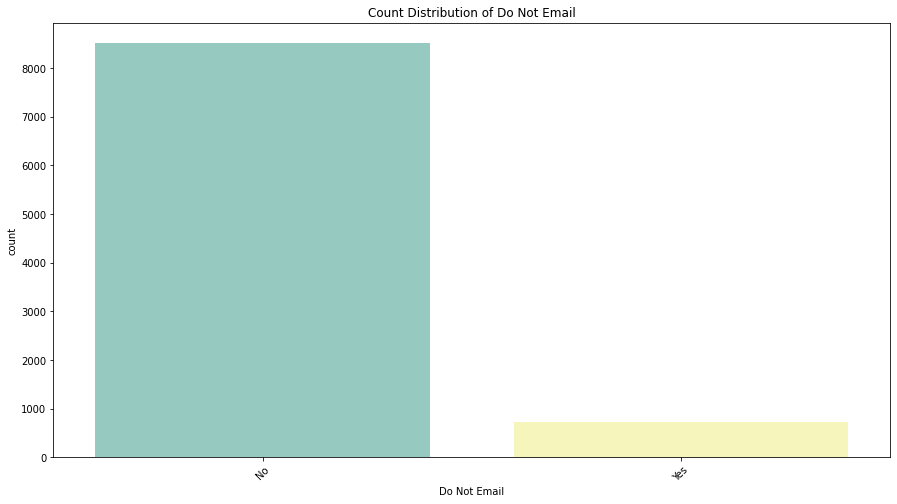

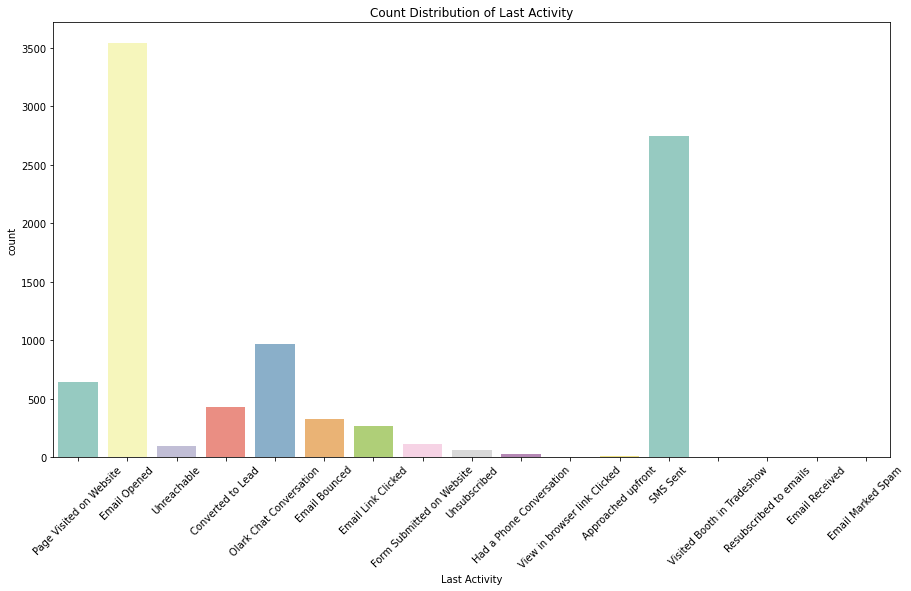

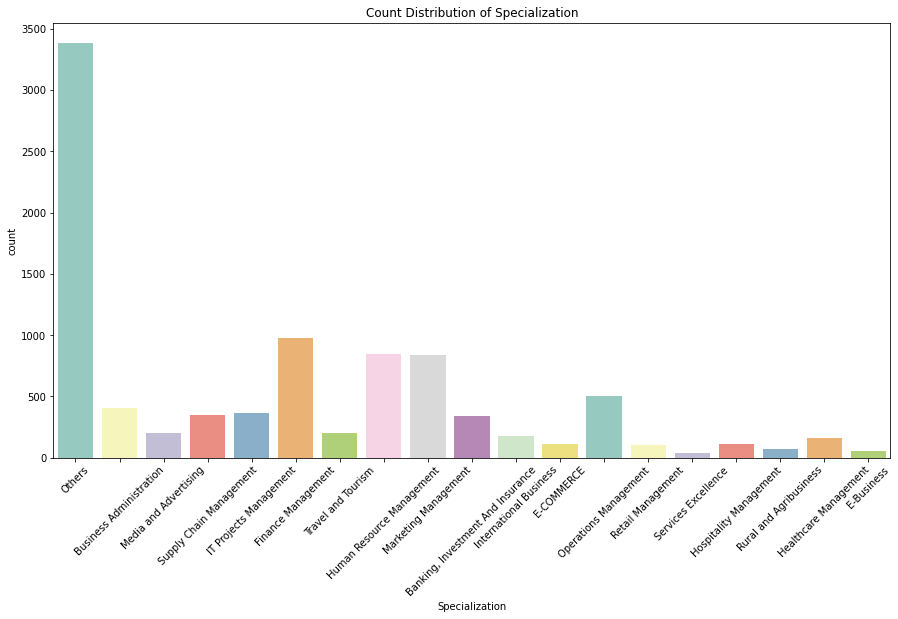

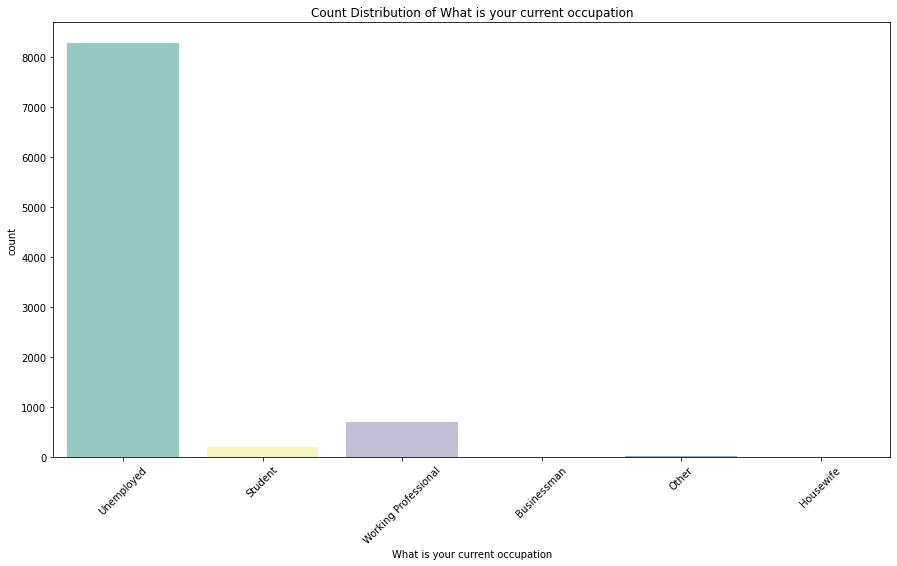

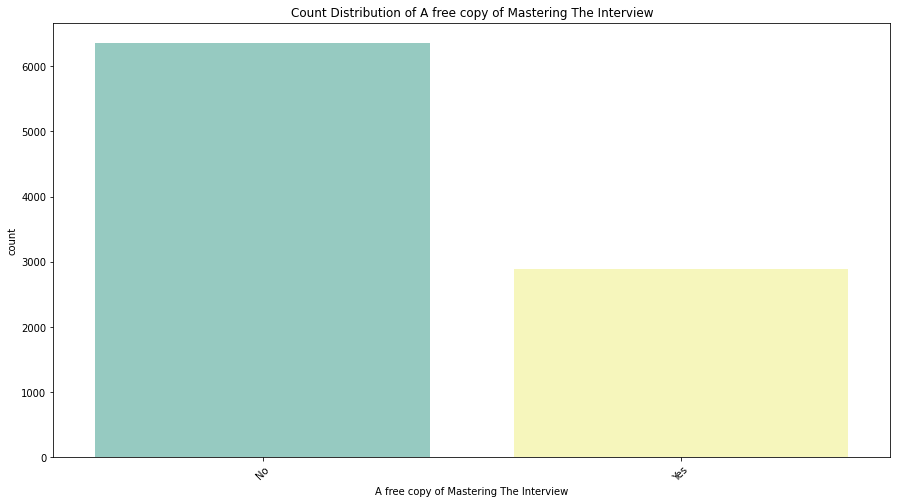

In [52]:
for i in categorical_col:
    plt.figure(figsize = (15, 8))
    plt.title('Count Distribution of '+i)
    plt.xticks(rotation=45)
    sns.countplot(x=i,data=df_leads,palette='Set3')


# Bivariate analysis


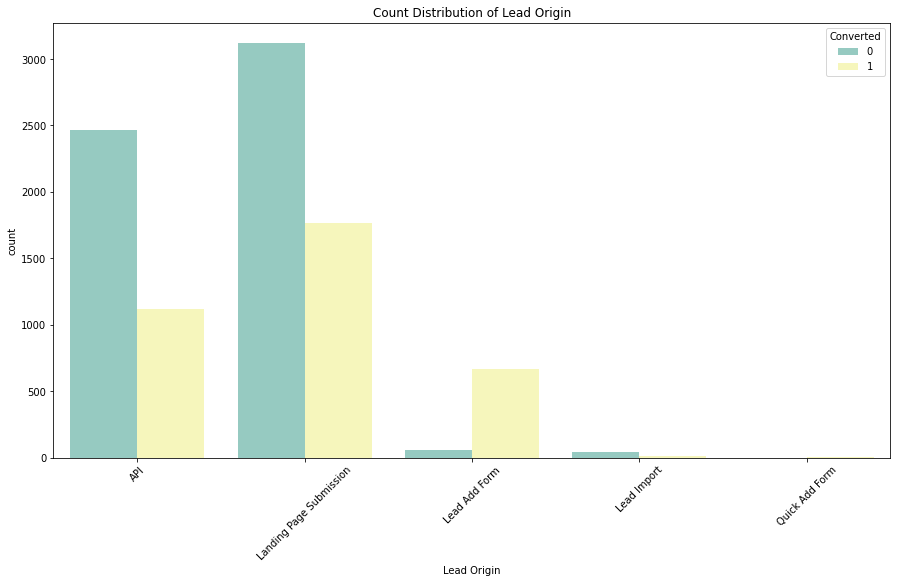

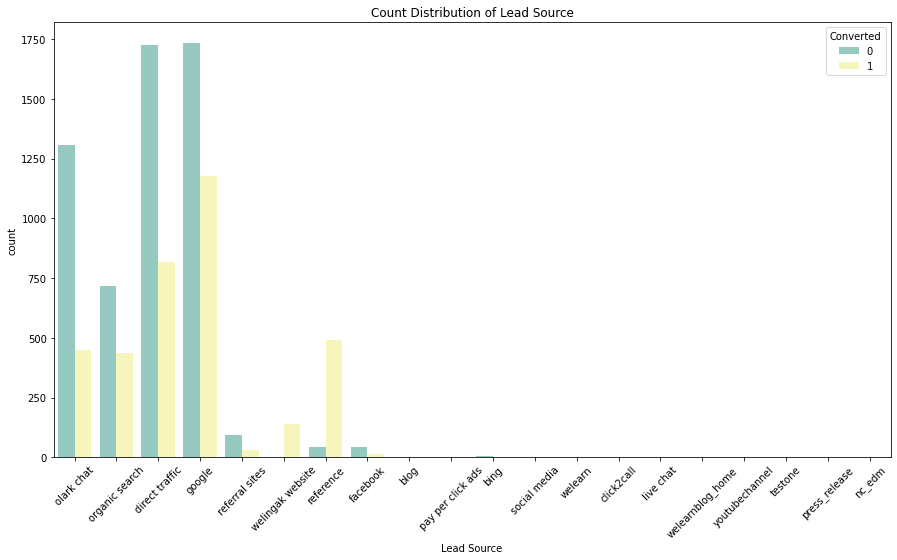

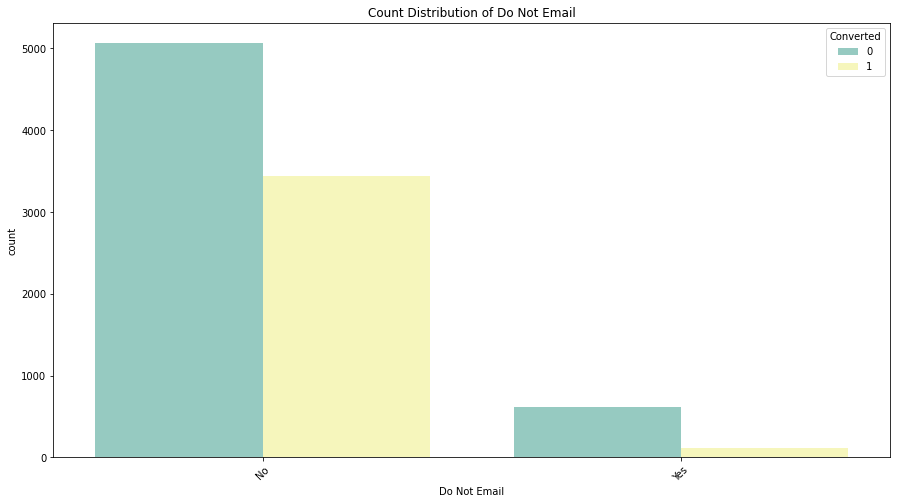

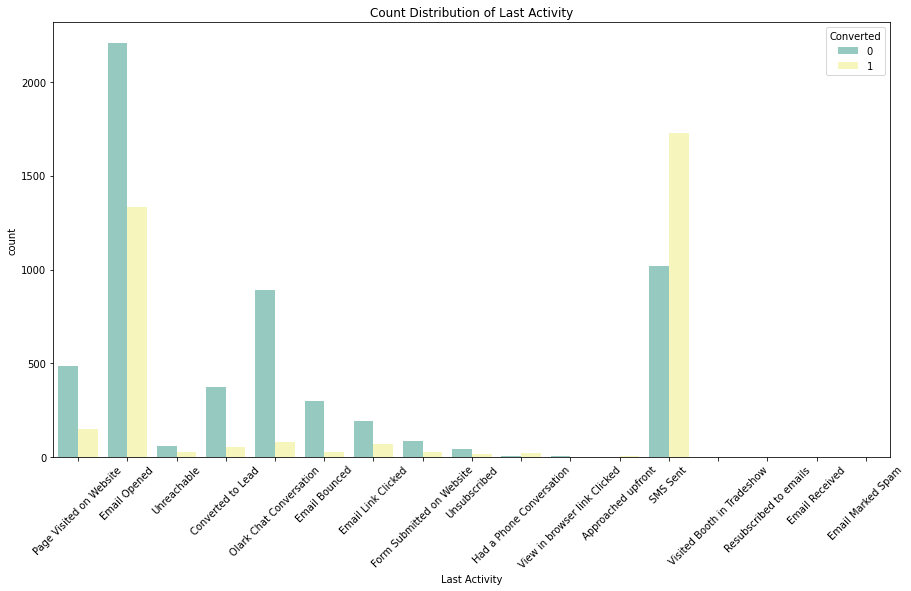

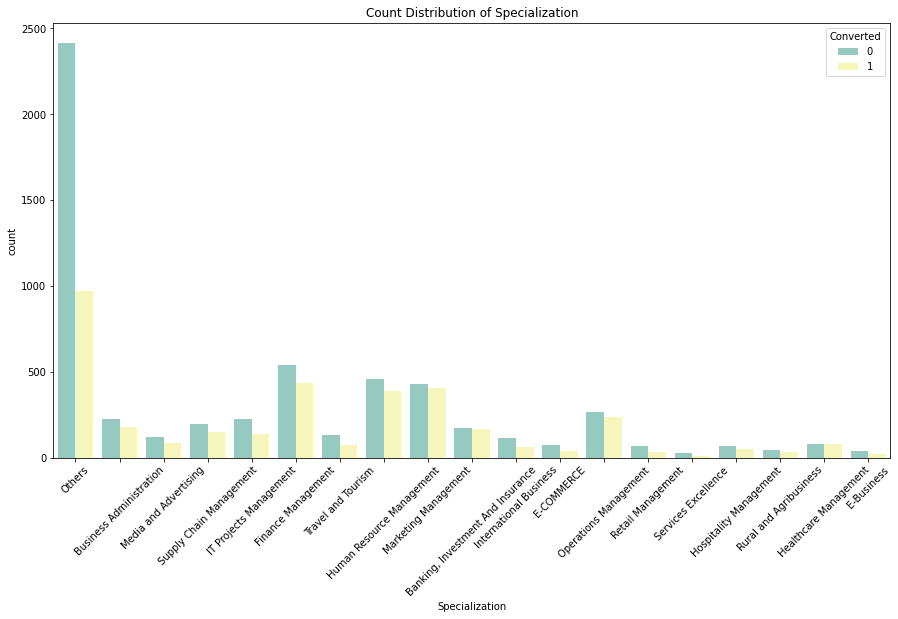

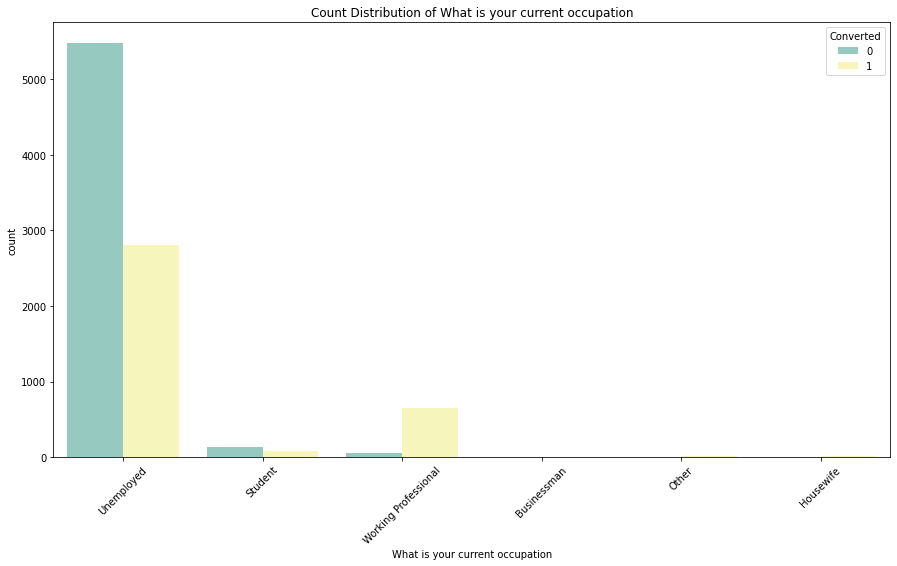

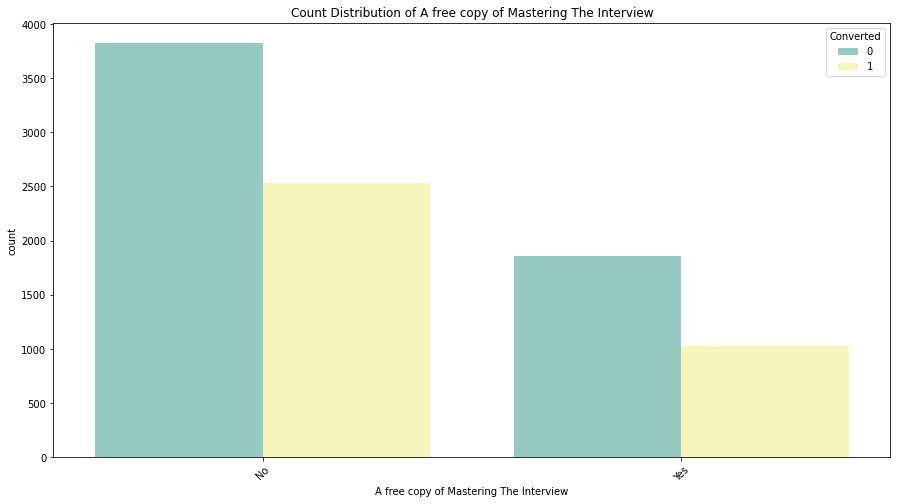

In [53]:
for i in categorical_col:
    plt.figure(figsize = (15, 8))
    plt.title('Count Distribution of '+i)
    plt.xticks(rotation=45)
    sns.countplot(x=i,hue='Converted',data=df_leads,palette='Set3')


<Figure size 1152x288 with 0 Axes>

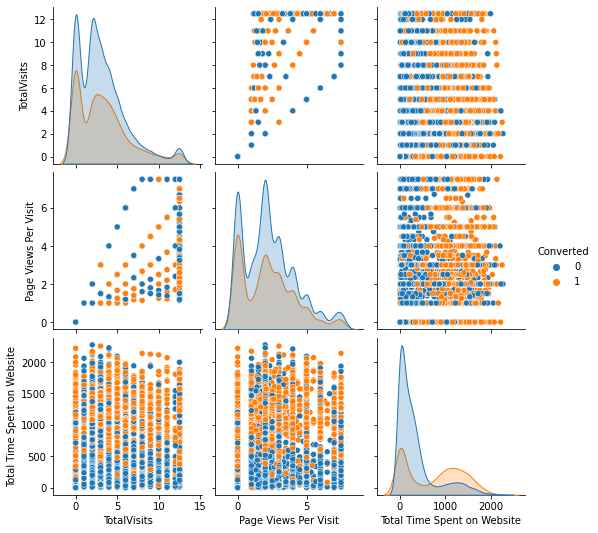

In [54]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=continuous_col,hue="Converted")                                  
plt.show()



In [55]:
continuous_col= ["TotalVisits","Page Views Per Visit","Total Time Spent on Website",'Converted']

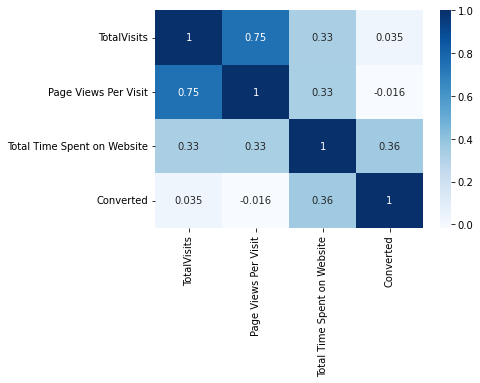

In [56]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[continuous_col].corr(),cmap="Blues",annot=True)
plt.show()


# Data Preparation

## Dummy variables

In [57]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,olark chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,organic search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,direct traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,direct traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [58]:
#check the columns which are of type object
temp=df_leads.loc[:,df_leads.dtypes=='object']

In [59]:
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [60]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

In [61]:
#create dummy variables with dummy command
dummy=pd.get_dummies(df_leads[['Lead Origin','Lead Source','Last Activity','Specialization',
                               'What is your current occupation','A free copy of Mastering The Interview']],drop_first=True)

#Adding results to master dataframe
df_leads=pd.concat([df_leads,dummy],axis=1)

In [62]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,API,olark chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,1,0,0
1,API,organic search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,direct traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,1,0,0,1
3,Landing Page Submission,direct traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df_leads=df_leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization',
                               'What is your current occupation','A free copy of Mastering The Interview'],1)

In [64]:
df_leads.shape

(9240, 68)

In [65]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 7   Lead Origin_Lead Import                               9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                            9240

# Train-Test Split

In [66]:
#Putting predictor value to X
X=df_leads.drop('Converted',axis=1)

#Putting Target valriable to Y
y=df_leads['Converted']

In [67]:
#Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [68]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)


X_train: (6468, 67) 
y_train: (6468,)


In [69]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)


X_test: (2772, 67) 
y_test: (2772,)


# Feature Scaling

In [70]:
# Scale the three numeric features present in the dataset
scaler=StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [71]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_blog,Lead Source_click2call,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
1871,-0.291638,-1.064974,-0.885371,-1.184892,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6795,-0.291638,0.262370,0.005716,-0.488713,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3516,-0.291638,0.594206,-0.691418,0.123715,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8105,-0.291638,0.594206,1.365219,1.432322,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


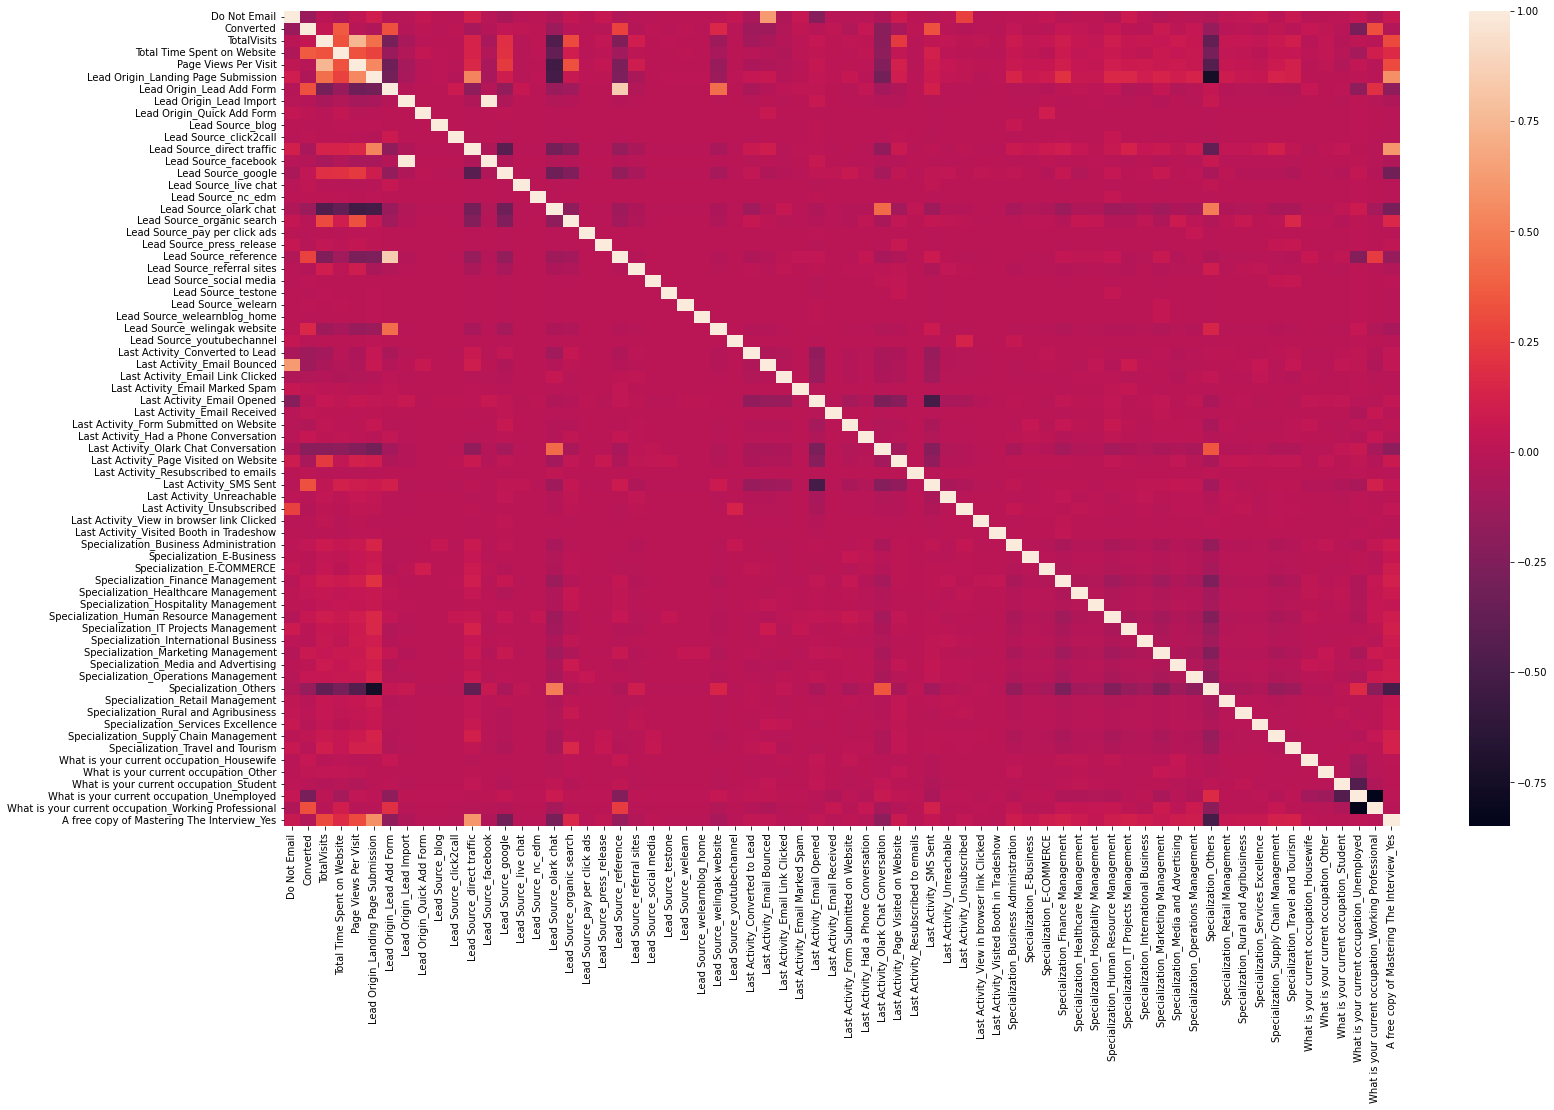

In [72]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(df_leads.corr())
plt.show()


In [73]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)


In [74]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR


38.53896103896104

# MODEL BUILDING

In [75]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)


In [76]:
#checking the output of RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 23),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 37),
 ('Lead Source_blog', False, 15),
 ('Lead Source_click2call', False, 27),
 ('Lead Source_direct traffic', False, 2),
 ('Lead Source_facebook', True, 1),
 ('Lead Source_google', False, 4),
 ('Lead Source_live chat', False, 7),
 ('Lead Source_nc_edm', False, 30),
 ('Lead Source_olark chat', False, 43),
 ('Lead Source_organic search', False, 3),
 ('Lead Source_pay per click ads', False, 33),
 ('Lead Source_press_release', False, 6),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_social media', False, 25),
 ('Lead Source_testone', False, 51),
 ('Lead Source_welearn', False, 28),
 ('Lead Source_welearnblog_home', False, 24),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel', False, 26),
 (

In [77]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')


,features,Feature Chosen,Ranking
32,Last Activity_Had a Phone Conversation,True,1
33,Last Activity_Olark Chat Conversation,True,1
63,What is your current occupation_Working Profes...,True,1
36,Last Activity_SMS Sent,True,1
26,Last Activity_Email Bounced,True,1
...,...,...,...
58,Specialization_Travel and Tourism,False,47
51,Specialization_Media and Advertising,False,48
29,Last Activity_Email Opened,False,49
42,Specialization_E-Business,False,50


In [78]:
#Put all the columns in variable
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_facebook', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [79]:
#columns are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Quick Add Form', 'Lead Source_blog',
       'Lead Source_click2call', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_live chat', 'Lead Source_nc_edm',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_pay per click ads', 'Lead Source_press_release',
       'Lead Source_social media', 'Lead Source_testone',
       'Lead Source_welearn', 'Lead Source_welearnblog_home',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tra

In [80]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X


# Model 1

In [81]:
#Building model using statsmodel, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

X_train_rfe=X_train[rfe_col]

In [82]:
#Fit the logistic regression model on X_train by adding constant and output the summary

X_train_sm1=sm.add_constant(X_train_rfe)

#Create a fitted model
logm1= sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial()).fit()

logm1.params

const                                                    0.121062
Total Time Spent on Website                              0.955528
Lead Origin_Landing Page Submission                     -1.557645
Lead Source_facebook                                    -0.991387
Lead Source_reference                                    2.491246
Lead Source_referral sites                              -0.480684
Lead Source_welingak website                             4.906439
Last Activity_Converted to Lead                         -1.269915
Last Activity_Email Bounced                             -1.687745
Last Activity_Had a Phone Conversation                   1.931756
Last Activity_Olark Chat Conversation                   -1.192085
Last Activity_SMS Sent                                   1.226453
Specialization_Hospitality Management                   -0.960727
Specialization_Others                                   -1.121006
What is your current occupation_Housewife               22.911691
What is yo

In [83]:
#Printing the summary of logistic model1
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.2
Date:                Sun, 19 Mar 2023   Deviance:                       5528.4
Time:                        05:14:36   Pearson chi2:                 9.29e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3779
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Column 'What is your current occupation_Housewife' have highest pvalue since acceptance threshold is 0.05 for statistical significance

# Model 2

In [84]:
#Dropping column 'What is your current occupation_Housewife' 
rfe_col=rfe_col.drop('What is your current occupation_Housewife')

In [85]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params


const                                                   0.127024
Total Time Spent on Website                             0.954859
Lead Origin_Landing Page Submission                    -1.552465
Lead Source_facebook                                   -0.992030
Lead Source_reference                                   2.507493
Lead Source_referral sites                             -0.482820
Lead Source_welingak website                            4.906695
Last Activity_Converted to Lead                        -1.276612
Last Activity_Email Bounced                            -1.695843
Last Activity_Had a Phone Conversation                  1.921976
Last Activity_Olark Chat Conversation                  -1.196084
Last Activity_SMS Sent                                  1.217951
Specialization_Hospitality Management                  -0.967186
Specialization_Others                                  -1.124229
What is your current occupation_Working Professional    2.690320
dtype: float64

In [86]:
#Printing the summary of logistic model1
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2771.3
Date:                Sun, 19 Mar 2023   Deviance:                       5542.6
Time:                        05:14:38   Pearson chi2:                 9.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3765
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Column 'Lead Source_referral sites' have highest pvalue since acceptance threshold is 0.05 for statistical significance

# MODEL 3

In [87]:
#Dropping column 'Lead Source_referral sites' 
rfe_col=rfe_col.drop('Lead Source_referral sites')

In [88]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params


const                                                   0.114153
Total Time Spent on Website                             0.952634
Lead Origin_Landing Page Submission                    -1.542909
Lead Source_facebook                                   -0.977992
Lead Source_reference                                   2.519270
Lead Source_welingak website                            4.920247
Last Activity_Converted to Lead                        -1.282459
Last Activity_Email Bounced                            -1.690493
Last Activity_Had a Phone Conversation                  1.913510
Last Activity_Olark Chat Conversation                  -1.194479
Last Activity_SMS Sent                                  1.223766
Specialization_Hospitality Management                  -0.965465
Specialization_Others                                  -1.129310
What is your current occupation_Working Professional    2.685926
dtype: float64

In [89]:
#Printing the summary of logistic model1
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.7
Date:                Sun, 19 Mar 2023   Deviance:                       5545.3
Time:                        05:14:42   Pearson chi2:                 9.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3763
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Column 'Lead Source_facebook' have highest pvalue since acceptance threshold is 0.05 for statistical significance

# MODEL 4

In [90]:
#Dropping column 'Lead Source_facebook' 
rfe_col=rfe_col.drop('Lead Source_facebook')

In [91]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params


const                                                   0.095233
Total Time Spent on Website                             0.953557
Lead Origin_Landing Page Submission                    -1.525056
Lead Source_reference                                   2.536465
Lead Source_welingak website                            4.934067
Last Activity_Converted to Lead                        -1.275896
Last Activity_Email Bounced                            -1.684940
Last Activity_Had a Phone Conversation                  1.917582
Last Activity_Olark Chat Conversation                  -1.181018
Last Activity_SMS Sent                                  1.224714
Specialization_Hospitality Management                  -0.983081
Specialization_Others                                  -1.124104
What is your current occupation_Working Professional    2.683967
dtype: float64

In [92]:
#Printing the summary of logistic model1
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2774.7
Date:                Sun, 19 Mar 2023   Deviance:                       5549.4
Time:                        05:14:46   Pearson chi2:                 9.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3759
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [93]:
get_vif(X_train_rfe)

,Features,VIF
0,Specialization_Others,1.60
1,Last Activity_SMS Sent,1.57
2,Lead Origin_Landing Page Submission,1.49
3,Last Activity_Olark Chat Conversation,1.35
4,What is your current occupation_Working Profes...,1.18
5,Lead Source_reference,1.17
6,Total Time Spent on Website,1.14
7,Last Activity_Converted to Lead,1.09
8,Last Activity_Email Bounced,1.08
9,Lead Source_welingak website,1.05


NOTE:
- Model 4 is stable and has p value <0.05, we can use it for further analysis
- No variable needs to drop as they all have good VIF value less than 5
- This model is acceptable as everything is under control

# Model Evaluation


- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall


In [94]:
# Getting the predicted value to train set
y_train_pred=logm4.predict(X_train_sm4)

y_train_pred[:10]

1871    0.321035
6795    0.072529
3516    0.156016
8105    0.749642
3934    0.133181
4844    0.986009
3297    0.106617
8071    0.999074
987     0.150968
7423    0.888812
dtype: float64

In [95]:
# for array
y_train_pred=y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([0.32103514, 0.07252897, 0.15601573, 0.74964243, 0.13318083,
       0.98600899, 0.10661732, 0.99907423, 0.15096766, 0.8888123 ])

In [96]:
#  creating dataframe with churn flag and the predicted probabilities
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Conversion_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.321035
1,0,0.072529
2,0,0.156016
3,0,0.749642
4,0,0.133181


Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities



In [97]:
y_train_pred_final['Predicted']=y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.321035,0
1,0,0.072529,0
2,0,0.156016,0
3,0,0.749642,1
4,0,0.133181,0


# Confusion Matrix

In [98]:
confusion=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
print(confusion)

[[3569  433]
 [ 850 1616]]


# Accuracy

In [99]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))


0.801638837353123


In [100]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]


In [101]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))


Sensitivity : 0.6553122465531225


In [102]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.8918040979510244


In [103]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))


0.10819590204897551


In [104]:
# positive predictive value 
print (TP / float(TP+FP))


0.7886774036115178


In [105]:
# Negative predictive value
print (TN / float(TN+ FN))


0.8076487893188504


# Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.



In [106]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [107]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Conversion_Prob"], drop_intermediate = False )


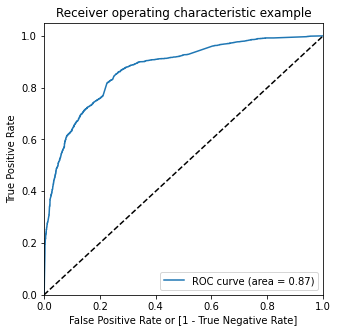

In [108]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Conversion_Prob"])


In [109]:
# Finding optimal Cutoff point/ Probability
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.321035,0,1,1,1,1,0,0,0,0,0,0
1,0,0.072529,0,1,0,0,0,0,0,0,0,0,0
2,0,0.156016,0,1,1,0,0,0,0,0,0,0,0
3,0,0.749642,1,1,1,1,1,1,1,1,1,0,0
4,0,0.133181,0,1,1,0,0,0,0,0,0,0,0


In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.545300  0.981346  0.276612
0.2   0.2  0.746599  0.900649  0.651674
0.3   0.3  0.782004  0.859286  0.734383
0.4   0.4  0.797619  0.725872  0.841829
0.5   0.5  0.801639  0.655312  0.891804
0.6   0.6  0.798083  0.592457  0.924788
0.7   0.7  0.777520  0.494323  0.952024
0.8   0.8  0.752938  0.397810  0.971764
0.9   0.9  0.706555  0.242903  0.992254


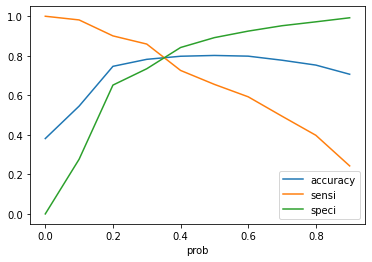

In [111]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


0.345 is the approx. point where all the curves meet, so 0.345 seems to be our Optimal cutoff point for probability threshold .

Lets do mapping again using optimal cutoff point

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.345 else 0)

y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.321035,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.072529,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.156016,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.749642,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.133181,0,1,1,0,0,0,0,0,0,0,0,0


In [113]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))


0.7818491032776747


In [114]:
#Creating confusion matrics again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3162,  840],
       [ 571, 1895]])

In [115]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [116]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))


Sensitivity : 0.7684509326845094


In [117]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.7901049475262368


# Precision and recall tradeoff


#### Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.



In [118]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])


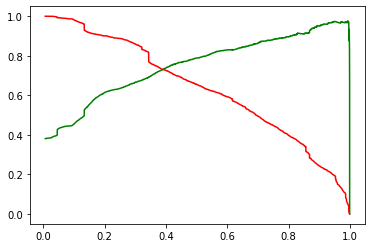

In [119]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")


plt.show()


NOTE: 
- The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.



In [120]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()


In [121]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Conversion_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,precision_recall_prediction
0,0,0.321035,0,1,1,1,1,0,0,0,0,0,0,0,0
1,0,0.072529,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.156016,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0.749642,1,1,1,1,1,1,1,1,1,0,0,1,1
4,0,0.133181,0,1,1,0,0,0,0,0,0,0,0,0,0


In [122]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7818491032776747

In [123]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[3162,  840],
       [ 571, 1895]])

In [124]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Calculate Precision

TP/(TP+FP)


0.6928702010968921

In [125]:
# Calculate Recall

TP/(TP+FN)


0.7684509326845094

NOTE:

- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.


# Adding Lead Score Feature to Training dataframe
- A higher score would mean that the lead is hot, i.e. is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [126]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Conversion_Prob'].map( lambda x: round(x*100))
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,final_predicted,Lead_Score
0,0,0.321035,0,0,32
1,0,0.072529,0,0,7
2,0,0.156016,0,0,16
3,0,0.749642,1,1,75
4,0,0.133181,0,0,13


# Making predictions on Test data

In [127]:
# Scaling data
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2772 non-null   int64  
 1   TotalVisits                                           2772 non-null   float64
 2   Total Time Spent on Website                           2772 non-null   int64  
 3   Page Views Per Visit                                  2772 non-null   float64
 4   Lead Origin_Landing Page Submission                   2772 non-null   uint8  
 5   Lead Origin_Quick Add Form                            2772 non-null   uint8  
 6   Lead Source_blog                                      2772 non-null   uint8  
 7   Lead Source_click2call                                2772 non-null   uint8  
 8   Lead Source_direct traffic                            2

In [128]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])



In [129]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Quick Add Form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
4269,-0.291638,1.589714,0.964504,2.740929,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2376,-0.291638,-1.064974,-0.885371,-1.184892,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7766,-0.291638,0.594206,-0.777416,1.432322,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9199,-0.291638,-1.064974,-0.885371,-1.184892,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4359,-0.291638,-1.064974,-0.885371,-1.184892,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [130]:
X_test = X_test[rfe_col]
X_test.head()


,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_reference,Lead Source_welingak website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,1,0,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,0,0,0,0,1
9199,-0.885371,0,0,0,0,0,0,1,0,0,1,0
4359,-0.885371,0,1,0,0,0,0,0,0,0,0,0


In [131]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape


(2772, 13)

In [132]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)


In [133]:
# top 10 columns
y_test_pred[:10]


4269    0.753163
2376    0.868534
7766    0.884718
9199    0.045039
4359    0.856614
9186    0.504610
1631    0.375985
8963    0.196941
8007    0.049747
5324    0.316436
dtype: float64

In [134]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()


,0
4269,0.753163
2376,0.868534
7766,0.884718
9199,0.045039
4359,0.856614


In [135]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()


,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [136]:
# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()


,Converted,0
4269,1,0.753163
2376,1,0.868534
7766,1,0.884718
9199,0,0.045039
4359,1,0.856614


In [137]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Converted','Conversion_Prob'], axis=1)

y_pred_final.head()


,Converted,Conversion_Prob
4269,1,0.753163
2376,1,0.868534
7766,1,0.884718
9199,0,0.045039
4359,1,0.856614


In [138]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()


,Converted,Conversion_Prob,final_predicted
4269,1,0.753163,1
2376,1,0.868534,1
7766,1,0.884718,1
9199,0,0.045039,0
4359,1,0.856614,1


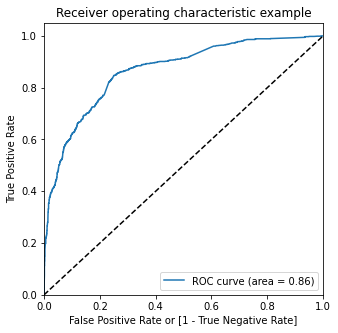

In [139]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Conversion_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Conversion_Prob"])


In [140]:
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])


In [141]:
print("Confusion Matrix")
print(confusion_matrix,"\n")


Confusion Matrix
[[1323  354]
 [ 251  844]] 



In [142]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.7817460317460317

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [144]:
# Calculate sensitivity
TP / float(TP+FN)


0.7684509326845094

In [145]:
# Calculate specificity
TN / float(TN+FP)


0.7901049475262368

Adding Lead Score Feature to Test dataframe


In [146]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Conversion_Prob'].map( lambda x: round(x*100))
y_pred_final.head()


,Converted,Conversion_Prob,final_predicted,Lead_Score
4269,1,0.753163,1,75
2376,1,0.868534,1,87
7766,1,0.884718,1,88
9199,0,0.045039,0,5
4359,1,0.856614,1,86


Lead Score: Lead Score is assigned to the customers

- The customers with a higher lead score have a higher conversion chance
- The customers with a lower lead score have a lower conversion chance.
